# Effects of Averaging the data Pre Capacitor addition

Now we look at analyzing the signal to work out the curve.

In [1]:
import pandas as pd
import numpy as np
import unittest
import altair as alt

from src.data_processing import create_data_from_entry, flatten_data
from src.vizualization import generate_stability_rules, LINE_COLOUR

# Render altair charts correctly
alt.renderers.enable('notebook')

# Store the altair char json separately and not in the notebook to reduce
# notebook size
alt.data_transformers.enable('json')

%load_ext autoreload
%autoreload 2

## Load Data

First we import the calibrated data found in . As we will only look at the first couple of packets of data, we only import the first 5 rows.

In [2]:
data = pd.read_csv("C:\\Users\\olz75487\\Documents\\muonfe\\data\\processed\\pre-capactitor-raw-data.csv", nrows=6000)

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,90.371049,89.006572,88.368966,87.999155,84.658099,87.297788,86.985361,87.680352,87.457190,89.784452,...,91.671765,92.385884,93.144635,94.674890,93.291285,93.986275,93.661096,93.348669,91.608005,2018-09-21 16:56:48.930999994
1,93.246652,91.888552,90.619716,90.434810,88.745154,87.520950,88.413599,86.175602,86.704815,86.985361,...,88.872675,89.580418,90.479442,91.454979,92.424141,92.022449,93.514447,93.578207,92.819456,2018-09-21 16:56:49.041000128
2,91.486860,90.913014,88.292454,88.930060,88.209565,85.537996,87.285036,86.456148,86.596422,88.171309,...,89.746195,91.620757,92.035201,92.985234,94.387967,93.928891,93.559079,94.215813,91.952312,2018-09-21 16:56:49.367999792
3,89.344504,91.142552,90.804621,92.749320,92.105338,94.222189,93.348669,94.107420,93.565455,92.609046,...,89.905597,89.593170,87.967275,88.062916,85.735654,87.195771,86.035328,86.851464,88.209565,2018-09-21 16:56:49.640000105
4,87.731360,89.452897,91.066040,92.334876,92.570790,95.204103,93.329541,93.960771,93.463438,93.093627,...,90.696228,88.713274,88.171309,88.031035,85.722901,86.857840,86.985361,86.679310,87.565583,2018-09-21 16:56:49.912999868


## Averaging effect

The DAQ is sampling at 1000Hz collecting 100 samples before giving the data to the IOC. This happens every 0.1 second so a new sample is taken every 0.001 seconds. At 50Hz, the signal repeats every 1/50 = 0.02 seconds. So a period lasts is 20 samples. Thus to average out the 50Hz we need to average every ten samples.

We create a new data set from the rolling average of two samples 0.01 seconds apart.

Each element (row, col) of this data set is the average of the values (row, col) and (row, col + 10).

In [4]:
def create_rolling_averages(row, increment=10):
    """
    Creates an array of rolling averages
    
    Args:
        row (pandas series): Row of a pandas dataframe.
        increment (int, optional): Increment of the point 
    Return:
        averages (list): Row for a pandas dataframe with rolling averages.
    """
    values = row.drop("Datetime")
    averages =  [np.mean([values[i], values[i + increment]]) for i in range(0, values.size - increment)]
    averages.insert(0, row["Datetime"])
    return averages

class AveragingTests(unittest.TestCase):
    
    def test_that_GIVEN_a_row_THEN_an_array_of_rolling_averages_is_produced(self):
        # Given:
        timestamp = datetime.datetime.utcnow()
        row = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, timestamp],
                        index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Datetime"])

        # Then:
        result = create_rolling_averages(row, increment=2)
        expected = [timestamp, 2, 3, 4, 5, 6, 7, 8, 9]

        self.assertEquals(result, expected)

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_that_GIVEN_a_row_THEN_an_array_of_rolling_averages_is_produced (__main__.AveragingTests) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [5]:
rolling_averages = data.apply(create_rolling_averages, axis=1, result_type='expand').rename(columns={0: "Datetime"})
rolling_averages.head()

,Datetime,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2018-09-21 16:56:48.930999994,89.937477,90.307289,89.994862,90.479442,89.854588,90.284972,90.288160,91.110672,90.109631,...,90.074562,90.386989,90.425246,90.798245,90.205272,90.131947,90.603775,90.415682,90.320041,89.867340
1,2018-09-21 16:56:49.041000128,90.182955,90.109631,89.940665,90.508135,89.991674,90.320041,90.332793,90.128759,90.272220,...,90.122383,90.205272,90.399741,90.112819,90.163827,90.052246,90.422058,89.682435,90.444374,89.966169
2,2018-09-21 16:56:49.367999792,90.109631,90.345545,90.013990,90.549579,90.587835,90.457126,90.326417,90.128759,90.208460,...,89.899221,90.112819,90.240340,90.170203,90.645220,89.947041,90.575083,89.784452,90.540015,90.141511
3,2018-09-21 16:56:49.640000105,90.300913,90.810997,90.182955,90.409306,89.969357,89.848212,90.294537,90.128759,90.119195,...,90.399741,89.714315,90.533639,89.813144,90.125571,89.625050,90.495382,89.934289,90.422058,90.096879
4,2018-09-21 16:56:49.912999868,89.829084,90.141511,89.835460,90.399741,90.109631,90.106443,90.555955,90.163827,90.237152,...,90.275408,90.198896,90.135135,90.119195,90.540015,90.033118,90.205272,89.966169,90.313665,90.029930


## Comparsion between raw data and averaged data

Lets look at how this averaging process affects the mean and standard deviation of the signal.

First we flattern the non-averaged data and look at the mean and standard deviation and plot the data.

In [6]:
raw_data = flatten_data(data)
raw_data.head()

,Datetime,Value
0,2018-09-21 16:56:48.930999994,90.371049
1,2018-09-21 16:56:48.932099995,89.006572
2,2018-09-21 16:56:48.933199996,88.368966
3,2018-09-21 16:56:48.934299997,87.999155
4,2018-09-21 16:56:48.935399998,84.658099


In [7]:
data_mean = np.mean(raw_data)
data_mean

Value    90.24125
dtype: float64

In [8]:
data_std = np.std(raw_data)
data_std

Value    2.624633
dtype: float64

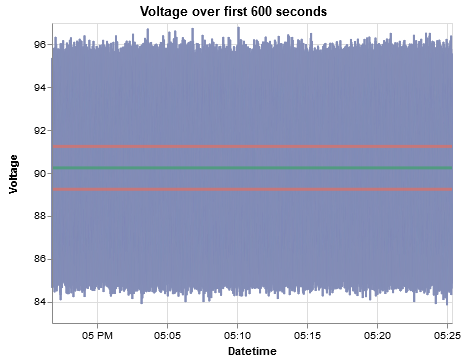

In [9]:
raw_stability_rules = generate_stability_rules(raw_data)

base = alt.Chart().mark_line(color=LINE_COLOUR).encode(
    x = "Datetime:T",
    y = alt.Y("Value:Q", scale = alt.Scale(domain=[83, 97]), title="Voltage")
)

alt.layer(base, raw_stability_rules, data=raw_data, 
          title="Voltage over first 600 seconds", 
          config={"background": "white"})

Now we flattern the averaged data and look at the mean and standard deviation

In [10]:
rolling_averages = flatten_data(rolling_averages)
rolling_averages.head()

,Datetime,Value
0,2018-09-21 16:56:48.930999994,89.937477
1,2018-09-21 16:56:48.932099995,90.307289
2,2018-09-21 16:56:48.933199996,89.994862
3,2018-09-21 16:56:48.934299997,90.479442
4,2018-09-21 16:56:48.935399998,89.854588


In [11]:
rolling_mean = np.mean(rolling_averages)
rolling_mean

Value    90.241489
dtype: float64

In [12]:
rolling_std = np.std(rolling_averages)
rolling_std

Value    0.272833
dtype: float64

Lets look at the differences between the rolling average mean and standard deviation and the orginal data

In [13]:
data_mean - rolling_mean

Value   -0.000239
dtype: float64

In [14]:
1- rolling_std/data_std

Value    0.896049
dtype: float64

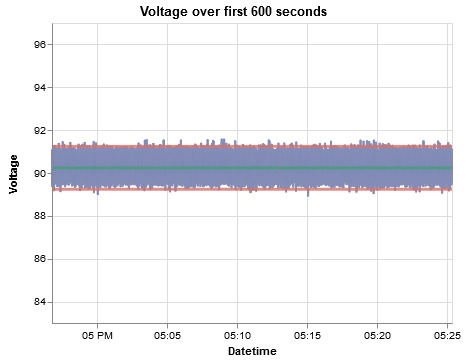

In [15]:
averaged_stability_rules = generate_stability_rules(rolling_averages)

base = alt.Chart().mark_line(color=LINE_COLOUR).encode(
    x = "Datetime:T",
    y = alt.Y("Value:Q", scale = alt.Scale(domain=[83, 97]), title="Voltage")
)

alt.layer(base, averaged_stability_rules, data=rolling_averages,
          title="Voltage over first 600 seconds", 
          config={"background": "white"})

## Conclusion

By averaging the samples using a rolling average to cancel the 50Hz signal we reduce the standard deviation of the signal by 89.6%. As you can see from the charts above, the signal is far smoother than before. The max and min are now very close to the stability bounds. The avearged data has only 30.9ms seconds of instability in 10 minutes.

In [16]:
np.max(rolling_averages["Value"])

91.614380920000002

In [17]:
np.min(rolling_averages["Value"])

88.891803299999992

In [18]:
unstable_readings = rolling_averages[(rolling_averages["Value"] > float(rolling_mean) + 1) |
                                      (rolling_averages["Value"] < float(rolling_mean) - 1)]
unstable_readings["Value"].size/1000.0

0.309